<a href="https://colab.research.google.com/github/CienciaDatosUdea/002_EstudiantesAprendizajeEstadistico/blob/main/semestre2024-2/Sesiones/Sesion_05_regresion_multivariadaV3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>




# Laboratorio 04
Objetivo: Programar una regresión multivariada


1. Para simular un conjunto de características $x_1$ , $x_2$,..., $x_n$ trabajaremos en la primera parte con dos características de datos aleatorios que presentan un plano y mostraremos que los párametros optimizados se corresponden con el valor esperado.

- Definir la ecuación  $y = 2.1*x_1 - 3.1*x_2$, y generar números aleatorios que pertenecen al plano.

- Realizar un diagrama 3D de los puntos generados aleatoriamente.


Nuestro objetivo será encontrar los valores $\theta_0 = 0, \theta_1=2.1, \theta_1=3.1$ que mejor ajustar el plano, empleando cálculos vectorizados.

2. Inicializar conjunto de parámetros $\Theta$ de manera aleatoria.
3. Construir la matrix X con dimensiones $(n+1, m)$, m es el numero de datos de entrenamiento y (n) el número de caracteristicas.
4. Calcular la función de coste(revise cuidosamente las dimensiones de cada matriz):

  - $h = \Theta^{T} X $
  - $\Lambda= (h -Y) $
  - $\Lambda*= (h -Y)^2 $
  - $\Lambda= [\Lambda_1,\Lambda_2, ...,\Lambda_m]$
  - $J = \frac{1}{2m} \sum_{i}^m \Lambda_i $

5. Aplicar el gradiente descendente:
  - Encontrar el gradiente.
    $\nabla J = \Lambda X.T$
  
  - Actualizar los nuevos parametros:
    $\Theta_{n+1}=\Theta_{n}-\alpha\nabla J$


6. Iterar para encontrar los valores $\Theta$ que se ajustan el plano.


In [1]:
import numpy as np
import matplotlib.pylab as plt
import pandas as pd
import plotly.graph_objects as go

#1.
Definición de los puntos, ecuación de la recta y gráfica en 3D

In [26]:
N=100
x1=np.linspace(-1, 1, N)
x2=np.linspace(-1, 1, N)
X_1,X_2 =np.meshgrid(x1, x2)
Y = 0.2*X_1+0.5*X_2

In [27]:

N = 100
x1 = np.linspace(-1, 1, N)
x2 = np.linspace(-1, 1, N)
X_1, X_2 = np.meshgrid(x1, x2)
Y = 0.2 * X_1 - 0.5 * X_2
fig = go.Figure(go.Surface(x=X_1, y=X_2, z=Y))
fig.show()

In [31]:
N=100
x_1= 2*np.random.random(N)-1
x_2= 2*np.random.random(N)-1
y_label = 0.2 * x_1 - 0.5 * x_2 #+ 0.2*(2*np.random.random(N)-1)
fig = go.Figure(go.Surface(x=X_1, y=X_2, z=Y))
fig.add_trace(go.Scatter3d(x=x_1, y=x_2, z=y_label, mode='markers', marker=dict(size=4, color='white')))
fig.show()

#2 y 3

2. Inicializar conjunto de parámetros $\Theta$ de manera aleatoria.
3. Construir la matrix X con dimensiones $(n+1, m)$, m es el numero de datos de entrenamiento y (n) el número de caracteristicas.

In [32]:
N = 100
x_1 = 2 * np.random.random(N) - 1
x_2 = 2 * np.random.random(N) - 1

y_label = 0.2 * x_1 - 0.5 * x_2
df = pd.DataFrame({"x1":x_1, "x2":x_2, "y":y_label})
df["ones"]=1

In [33]:
X = df[["ones", "x1", "x2"]].values.T
Y = df.y.values.reshape(1, N)

In [34]:
Nfeatures = np.shape(X)[0]
m = np.shape(X)[1]
print(Nfeatures, m)

3 100


#4. y 5.

Función de coste para valores aleatorios de theta y gradiente descendente

In [35]:
def model(theta, X):
  return theta.T@X

def costo(h, Y):
  J= (h-Y)**2
  return J.mean()

def update_params(theta, h, Y, learning_rate):
  """
  Gradiente descendente
  """
  grad = np.dot((h-Y), X.T).T
  theta = theta - learning_rate*grad
  return theta

In [36]:
theta=np.random.random(3).reshape(3, 1)
learning_rate=0.01
Niter=100
J = np.zeros(Niter)

for i in range(0, Niter):
  h = model(theta, X)
  J[i] = costo(h, Y)
  theta = update_params(theta, h, Y, learning_rate)

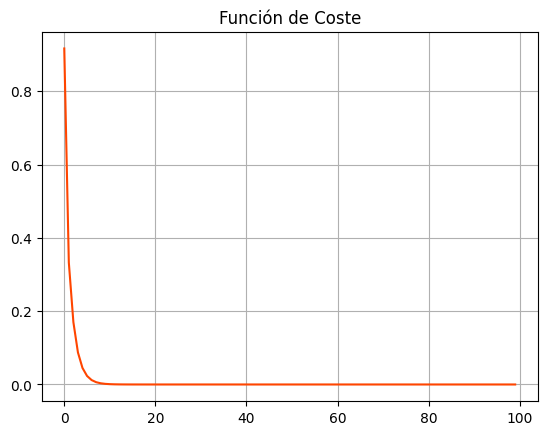

In [38]:
plt.plot(J,color='orangered')
plt.title('Función de Coste')
plt.grid()
plt.show()

In [39]:
import numpy as np

class MultilinearRegresion():
    def __init__(self, X, Y):
        self.X = X  # X debe tener forma (n_features, m)
        self.Y = Y  # Y debe tener forma (1, m)
        self.Nfeatures = X.shape[0]
        self.m = X.shape[1]
        self.theta = np.random.random(self.Nfeatures).reshape(self.Nfeatures, 1)
        self.J_history = []

    def model(self):
        self.h = self.theta.T @ self.X  # (1, m)

    def costo(self):
        J = ((self.h - self.Y) ** 2).mean()
        self.J_history.append(J)
        self.J = J

    def update_params(self, learning_rate):
        """
        Gradiente descendente
        """
        grad = np.dot((self.h - self.Y), self.X.T).T / self.m  # (n_features, 1)
        self.theta -= learning_rate * grad

    def fit(self, learning_rate, Niter=100):
        for i in range(Niter):
            self.model()
            self.costo()
            self.update_params(learning_rate)
        return self.theta

    def predict(self, X_new):
        return self.theta.T @ X_new


In [41]:
lr = MultilinearRegresion(X, Y)

In [42]:
lr.fit(0.01)

array([[0.16668394],
       [0.09097046],
       [0.07131866]])

#6.
Iterar para encontrar los valores $\Theta$ que se ajustan el plano.

In [61]:
modelo = MultilinearRegresion(X, Y)
theta_train = modelo.fit(learning_rate=0.01, Niter=1000)

for i, t in enumerate(theta_train.flatten()):
    print(f"θ_{i} = {t:.6f}")


θ_0 = -0.003394
θ_1 = 0.232320
θ_2 = -0.441186


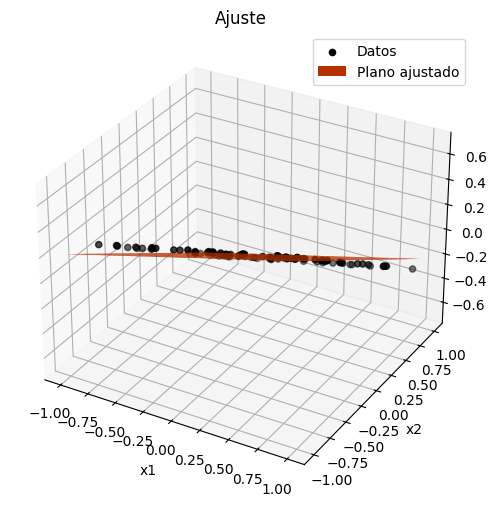

In [62]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_1, x_2, y_label, c='k', label='Datos')

xs = np.linspace(-1, 1, 10)
ys = np.linspace(-1, 1, 10)
xs, ys = np.meshgrid(xs, ys)

zs = (theta_train[0] + theta_train[1]*xs + theta_train[2]*ys)

ax.plot_surface(xs, ys, zs, color='orangered', label='Plano ajustado')
ax.legend()
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')
plt.title("Ajuste")
plt.show()

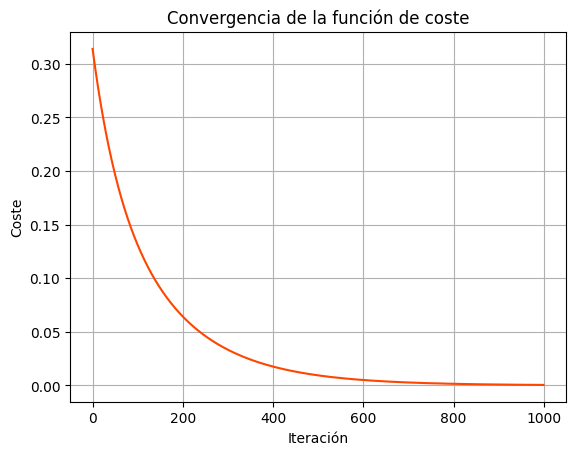

In [56]:
#Gráfica de la función de coste
plt.plot(modelo.J_history,color='orangered')
plt.xlabel("Iteración")
plt.ylabel("Coste")
plt.title("Convergencia de la función de coste")
plt.grid()
plt.show()